In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Step 2: Split features and target
X = df.drop("label", axis=1)

# Step 3: Encode crop labels to integers
le = LabelEncoder()
y = le.fit_transform(df["label"])  # y will now be integers 0 - n_classes

# Step 4: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features for models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define machine learning models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Step 7: Train, predict, evaluate
results = []

for name, model in models.items():
    print(f"Training {name}...")
    if name in ["SVM", "KNN", "MLP (Neural Net)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"]
    })

# Step 8: Show results table
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df)

Training Random Forest...
Training XGBoost...


/Users/yoyolin/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score 

/Users/yoyolin/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


/var/folders/cf/zn4dq46s1rx6x1s67d5x5v440000gn/T/ipykernel_3584/2512255746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


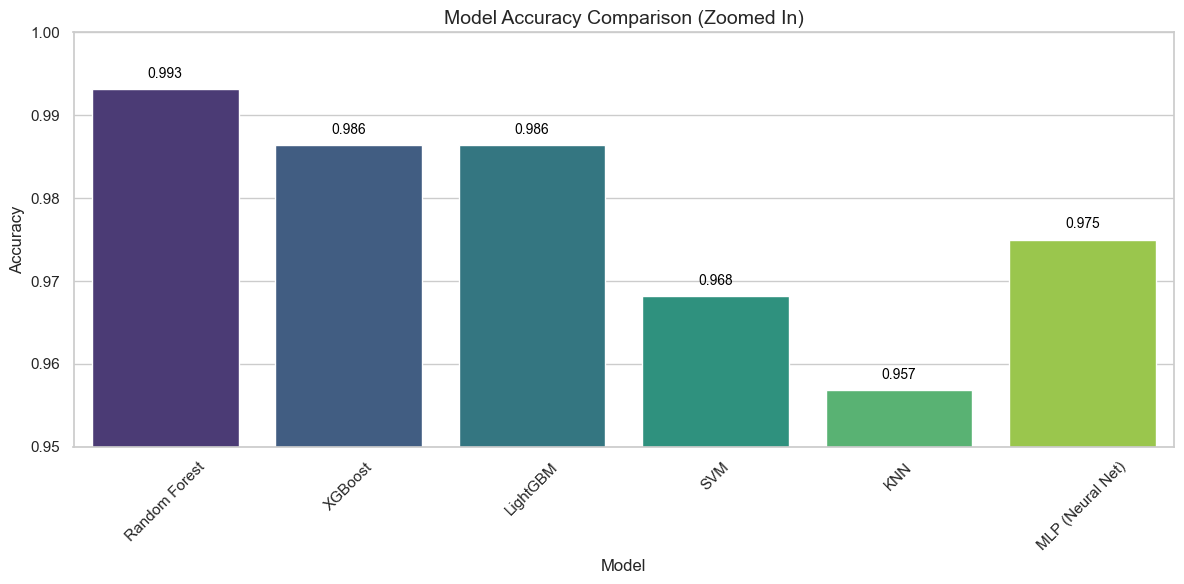

In [6]:
# Plot model accuracy with visible differences
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")

# Set y-axis limit to highlight differences
plt.ylim(0.95, 1.0)

# Add value labels on top of each bar
for i in range(len(results_df)):
    barplot.text(i, results_df["Accuracy"][i] + 0.001, f'{results_df["Accuracy"][i]:.3f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison (Zoomed In)", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/cf/zn4dq46s1rx6x1s67d5x5v440000gn/T/ipykernel_3584/1273267318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_f1 = sns.barplot(x="Model", y="F1 Score", data=results_df, palette="crest")


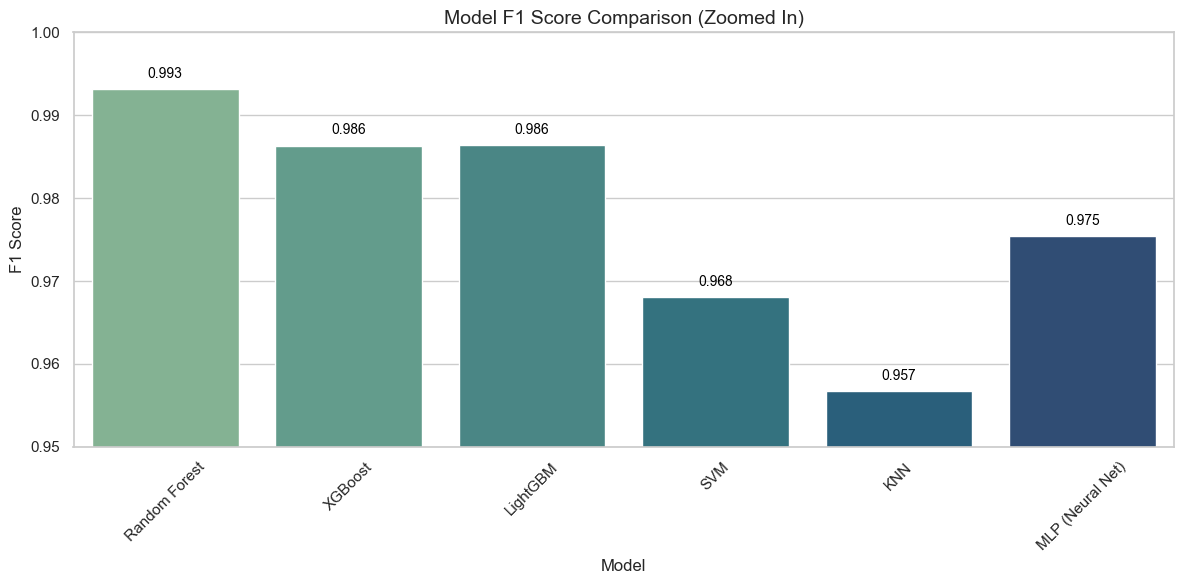

In [5]:
# Plot model F1 Score with visible differences
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
barplot_f1 = sns.barplot(x="Model", y="F1 Score", data=results_df, palette="crest")

# Set y-axis limit to highlight differences
plt.ylim(0.95, 1.0)

# Add value labels on top of each bar
for i in range(len(results_df)):
    barplot_f1.text(i, results_df["F1 Score"][i] + 0.001, f'{results_df["F1 Score"][i]:.3f}', 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title("Model F1 Score Comparison (Zoomed In)", fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
def plot_f1_scores(y_true, y_pred, model_name):
    from sklearn.metrics import classification_report
    import matplotlib.pyplot as plt

    # Decode labels
    y_true = le.inverse_transform(y_true)
    y_pred = le.inverse_transform(y_pred)

    # Classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    f1_scores = {label: score["f1-score"] for label, score in report.items() if label in le.classes_}
    f1_scores = dict(sorted(f1_scores.items(), key=lambda x: x[1], reverse=True))

    # Plot
    plt.figure(figsize=(14, 6))
    bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='salmon')

    # Zoom in the y-axis
    plt.ylim(min(f1_scores.values()) - 0.02, 1.01)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.002,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    plt.xticks(rotation=90)
    plt.ylabel("F1 Score")
    plt.title(f"Per-Class F1 Scores: {model_name}")
    plt.tight_layout()
    plt.show()

**Frandom foreset**

In [7]:
from sklearn.metrics import classification_report

# Predict using the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Decode predictions back to crop names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_rf)

# Print per-class precision, recall, F1
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

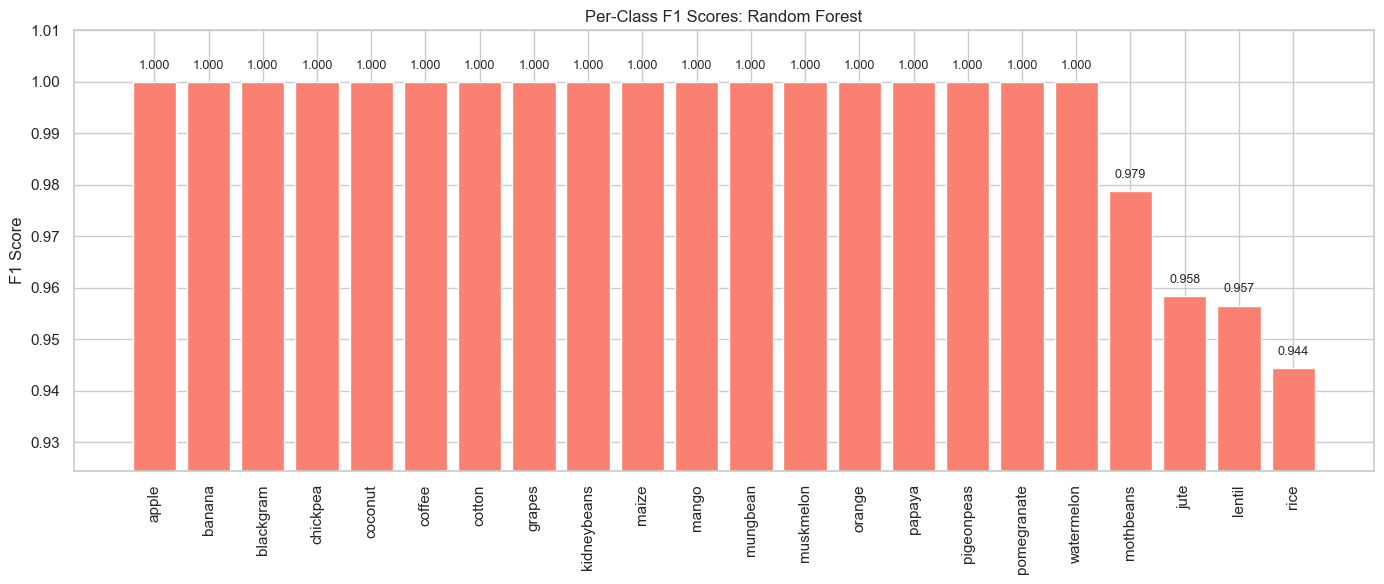

In [23]:
plot_f1_scores(y_test, y_pred_rf, "Random Forest")

**Light GBM**

In [9]:
# LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print("\n📊 LightGBM Classification Report")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_lgb)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

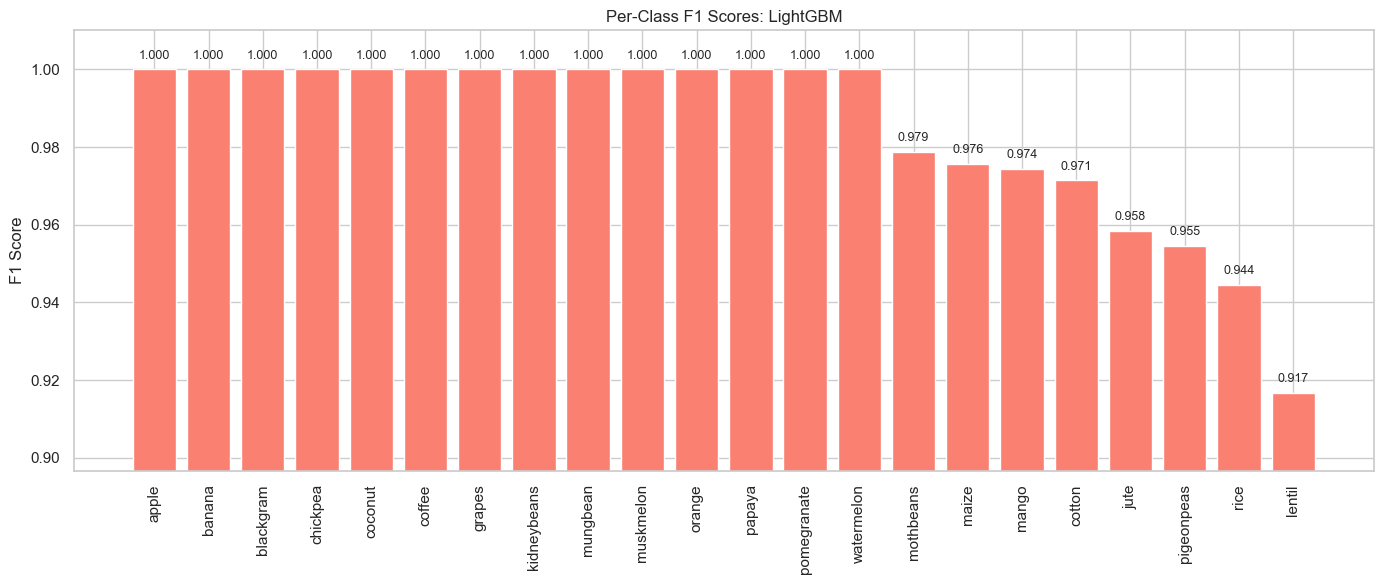

In [19]:
plot_f1_scores(y_test, y_pred_lgb, "LightGBM")

**SVM**

In [10]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Use scaled input
y_pred_svm = svm_model.predict(X_test_scaled)
print("\n📊 SVM Classification Report")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_svm)))


📊 SVM Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

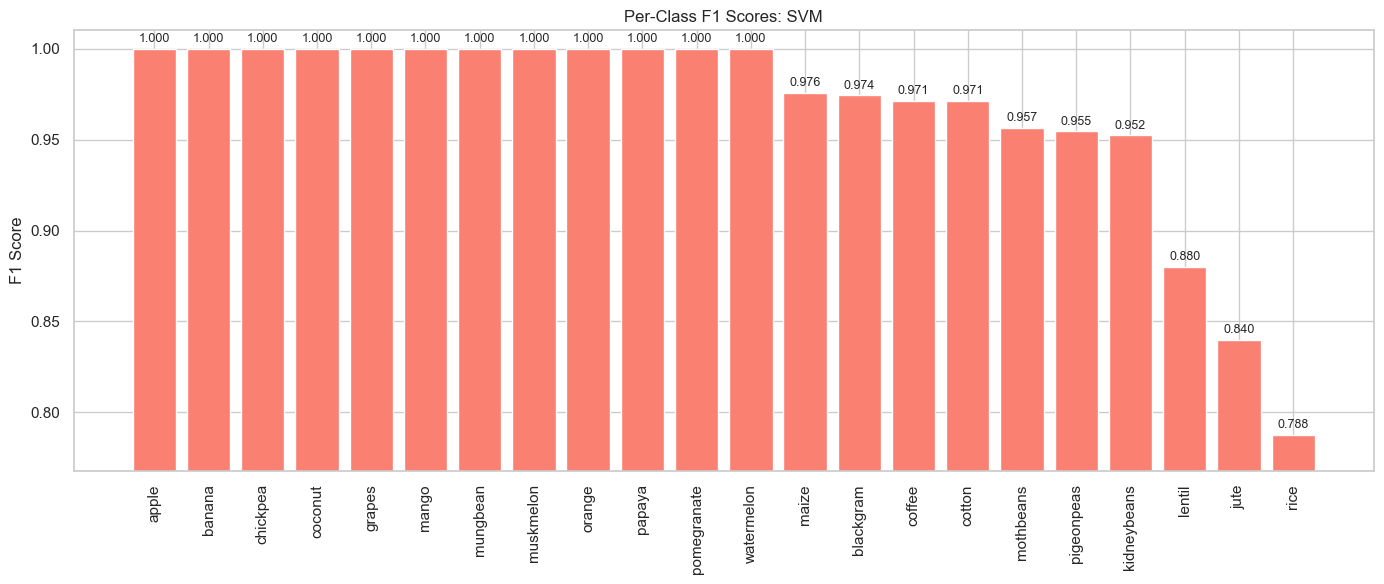

In [20]:
plot_f1_scores(y_test, y_pred_svm, "SVM")

**KNN**

In [11]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("\n📊 KNN Classification Report")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_knn)))


📊 KNN Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

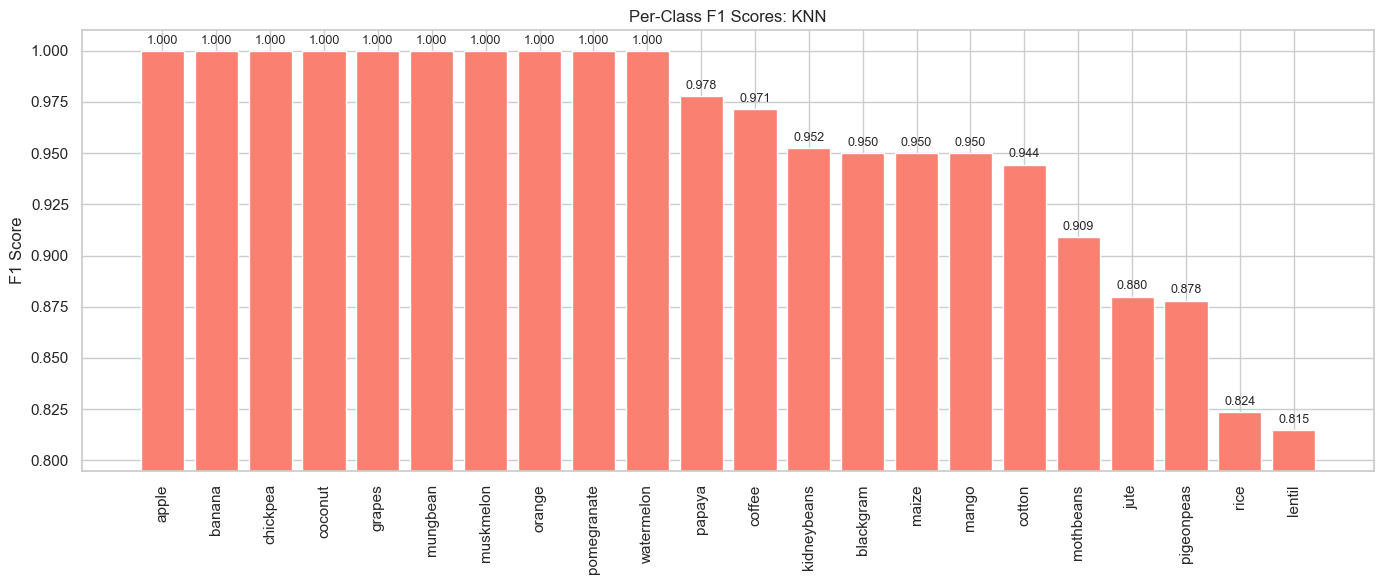

In [21]:
plot_f1_scores(y_test, y_pred_knn, "KNN")

**MLP**

In [12]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
print("\n📊 MLP (Neural Net) Classification Report")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_mlp)))


📊 MLP (Neural Net) Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.96      0.92        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      

/Users/yoyolin/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


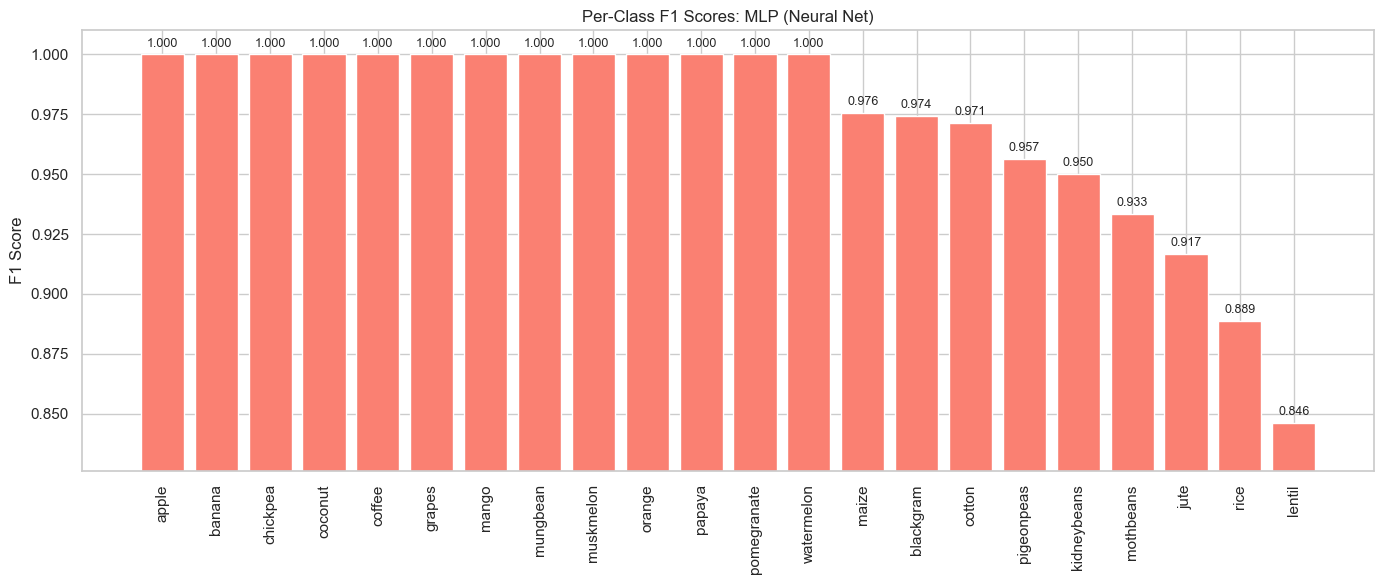

In [22]:
plot_f1_scores(y_test, y_pred_mlp, "MLP (Neural Net)")

**XGBoost**

In [13]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n📊 XGBoost Classification Report")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_xgb)))

/Users/yoyolin/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:26:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00     

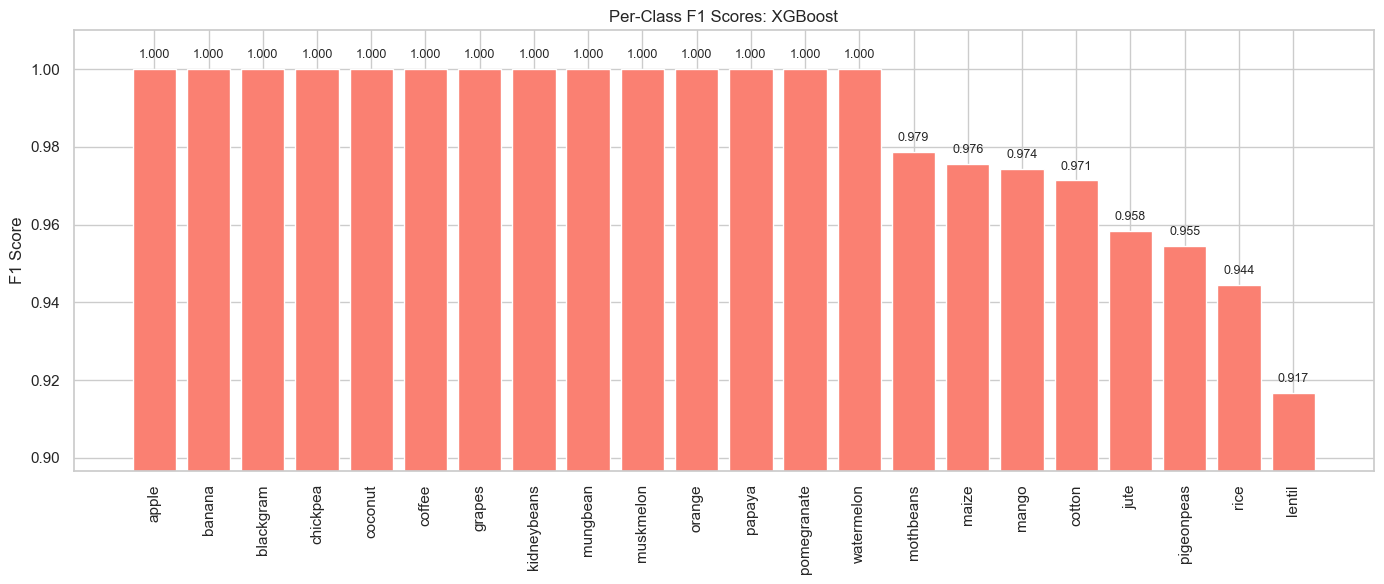

In [18]:
plot_f1_scores(y_test, y_pred_lgb, "XGBoost")